# Team 3 Big Data Project

## Project Overview


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# data_folder = "data/"

# csv_files = []
# for folder in os.listdir(data_folder):
#      for file in os.listdir(os.path.join(data_folder, folder)):
#          if file.endswith(".csv"):
#              csv_files.append(os.path.join(data_folder, folder, file))

# if csv_files:
#      try:
#          # Read all CSV files into dataframes and combine them
#          dataframes = [pd.read_csv(file, header=0) for file in csv_files]
#          combined_df = pd.concat(dataframes, ignore_index=True)

#          # Save the combined dataframe to a single CSV file
#          output_path = "data/combined_pandas.csv"
#          combined_df.to_csv(output_path, index=False)

#          print(f"Combined CSV saved to {output_path}")
#      except Exception as e:
#          print(f"An error occurred: {e}")

In [2]:
df=pd.read_csv("data/combined_pandas.csv", header=0)  # Read the combined CSV file
df

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,NaN,2023-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.491616,51.424619,On or near Julius Place,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,NaN,NaN
1,cdb81077299dc67d8fc95c0fe6392d7c9e1135a64ed13d...,2023-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.491616,51.424619,On or near Julius Place,E01014399,Bath and North East Somerset 001A,Drugs,Unable to prosecute suspect,NaN
2,ab9ed9e3b1aca933e1c34998e0096d337896e18e255680...,2023-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.491146,51.425008,On or near Maximus Gardens,E01014399,Bath and North East Somerset 001A,Drugs,Unable to prosecute suspect,NaN
3,fd998d416e135f955bdb4cf4cd0781b0c102a0ddf2160e...,2023-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.509285,51.409716,On or near Barnard Walk,E01014399,Bath and North East Somerset 001A,Vehicle crime,Status update unavailable,NaN
4,94c4f121096271e4059bcc2200c03e3d54203d89284c16...,2023-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.509285,51.409716,On or near Barnard Walk,E01014399,Bath and North East Somerset 001A,Violence and sexual offences,Offender given a caution,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
360119,ef8e1662196e21a10db05dfe1ca99bd8d306d0f0adb173...,2024-12,Avon and Somerset Constabulary,Avon and Somerset Constabulary,NaN,NaN,No Location,NaN,NaN,Other crime,Status update unavailable,NaN
360120,144f9f76b8e118510b79b77e681aaa63531765d781e3c3...,2024-12,Avon and Somerset Constabulary,Avon and Somerset Constabulary,NaN,NaN,No Location,NaN,NaN,Other crime,Further action is not in the public interest,NaN
360121,51c2c6debdd219a3eb9d4f91ff5c743b824d793987f71a...,2024-12,Avon and Somerset Constabulary,Avon and Somerset Constabulary,NaN,NaN,No Location,NaN,NaN,Other crime,Status update unavailable,NaN
360122,fdb9a04a685d370641598ba0660c6cf90a25fe6b8b0e97...,2024-12,Avon and Somerset Constabulary,Avon and Somerset Constabulary,NaN,NaN,No Location,NaN,NaN,Other crime,Status update unavailable,NaN


In [3]:
# Handle Missing Values
# For Crime Id we will be generating a new id for each missing values
df['Crime ID'] = df['Crime ID'].fillna(value=pd.Series(range(1, len(df) + 1)))

# For Longitude and Latitude we will be filling with the mean value
df['Longitude'] = df['Longitude'].fillna(df['Longitude'].mean())
df['Latitude'] = df['Latitude'].fillna(df['Latitude'].mean())

# For Crime type we set the missing to 'Other'
df['Crime type'] = df['Crime type'].fillna('Other')

# For Last outcome category we will set the missing to 'Other'
df['Last outcome category'] = df['Last outcome category'].fillna('Other')

df

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,1,2023-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.491616,51.424619,On or near Julius Place,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,Other,NaN
1,cdb81077299dc67d8fc95c0fe6392d7c9e1135a64ed13d...,2023-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.491616,51.424619,On or near Julius Place,E01014399,Bath and North East Somerset 001A,Drugs,Unable to prosecute suspect,NaN
2,ab9ed9e3b1aca933e1c34998e0096d337896e18e255680...,2023-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.491146,51.425008,On or near Maximus Gardens,E01014399,Bath and North East Somerset 001A,Drugs,Unable to prosecute suspect,NaN
3,fd998d416e135f955bdb4cf4cd0781b0c102a0ddf2160e...,2023-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.509285,51.409716,On or near Barnard Walk,E01014399,Bath and North East Somerset 001A,Vehicle crime,Status update unavailable,NaN
4,94c4f121096271e4059bcc2200c03e3d54203d89284c16...,2023-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.509285,51.409716,On or near Barnard Walk,E01014399,Bath and North East Somerset 001A,Violence and sexual offences,Offender given a caution,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
360119,ef8e1662196e21a10db05dfe1ca99bd8d306d0f0adb173...,2024-12,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.676073,51.340291,No Location,NaN,NaN,Other crime,Status update unavailable,NaN
360120,144f9f76b8e118510b79b77e681aaa63531765d781e3c3...,2024-12,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.676073,51.340291,No Location,NaN,NaN,Other crime,Further action is not in the public interest,NaN
360121,51c2c6debdd219a3eb9d4f91ff5c743b824d793987f71a...,2024-12,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.676073,51.340291,No Location,NaN,NaN,Other crime,Status update unavailable,NaN
360122,fdb9a04a685d370641598ba0660c6cf90a25fe6b8b0e97...,2024-12,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.676073,51.340291,No Location,NaN,NaN,Other crime,Status update unavailable,NaN


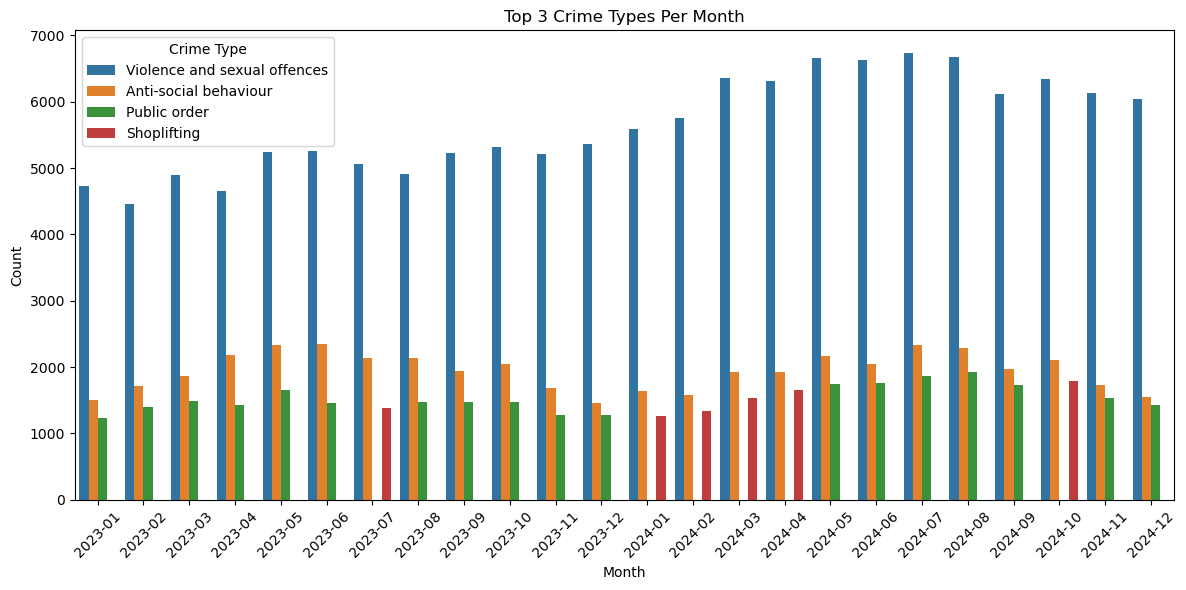

In [4]:
# EDA

## Top Crime Types Per Month
top_crime_types = df.groupby(['Month', 'Crime type']).size().reset_index(name='Count')
top_crime_types = top_crime_types.sort_values(['Month', 'Count'], ascending=[True, False])
top_crime_types = top_crime_types.groupby('Month').head(3)

## Plotting Top 3 Crime Types Per Month
plt.figure(figsize=(12, 6))
sns.barplot(data=top_crime_types, x='Month', y='Count', hue='Crime type')
plt.title('Top 3 Crime Types Per Month')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Crime Type')
plt.tight_layout()
plt.show()

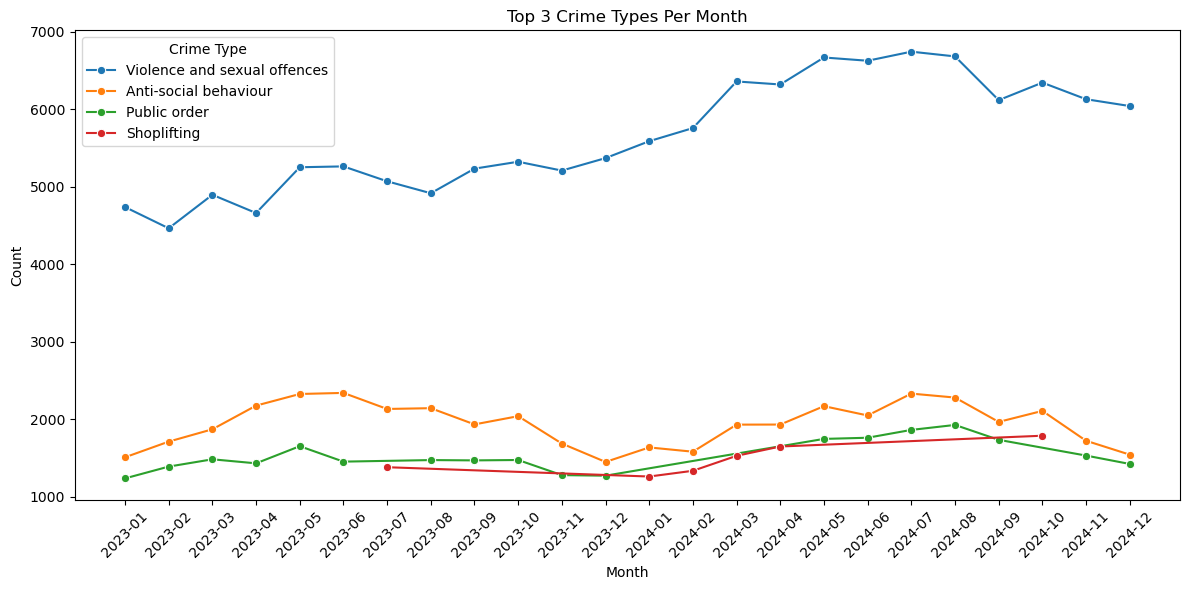

In [5]:
# Line chart for top_crime_types
plt.figure(figsize=(12, 6))
sns.lineplot(data=top_crime_types, x='Month', y='Count', hue='Crime type', marker='o')
plt.title('Top 3 Crime Types Per Month')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Crime Type')
plt.tight_layout()
plt.show()


In [6]:
# Group Data by seasons and ensure to specify the year in the season
# Function to get season based on month and year
def get_season(date_str):
    # date_str is in 'yyyy-mm' format
    dt = pd.to_datetime(date_str, format='%Y-%m')
    year = dt.year
    month = dt.month
    if month in [12, 1, 2]:
        # December is winter of current year, Jan/Feb is winter of previous year
        if month == 12:
            season_year = year
        else:
            season_year = year - 1
        season = f'Winter {season_year}'
    elif month in [3, 4, 5]:
        season = f'Spring {year}'
    elif month in [6, 7, 8]:
        season = f'Summer {year}'
    else:
        season = f'Autumn {year}'
    return season

# Apply the function to the Month column (which is in yyyy-mm format)
df['Season'] = df['Month'].apply(get_season)

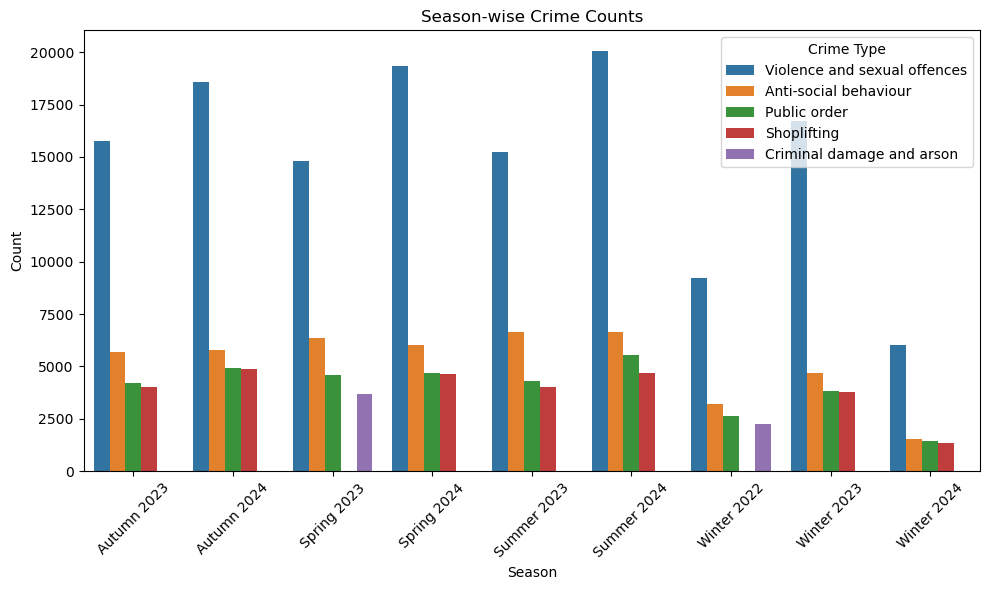

In [7]:
# Group by season and crime type
season_crime_counts = df.groupby(['Season', 'Crime type']).size().reset_index(name='Count').sort_values(['Season', 'Count'], ascending=[True, False])
# Take the top 4 crime types for each season
season_crime_counts = season_crime_counts.groupby('Season').head(4)
# Plotting Season-wise Crime Counts
plt.figure(figsize=(10, 6))
sns.barplot(data=season_crime_counts, x='Season', y='Count', hue='Crime type', palette='tab10')
plt.title('Season-wise Crime Counts')
plt.xlabel('Season')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Crime Type')  
plt.tight_layout()
plt.show()

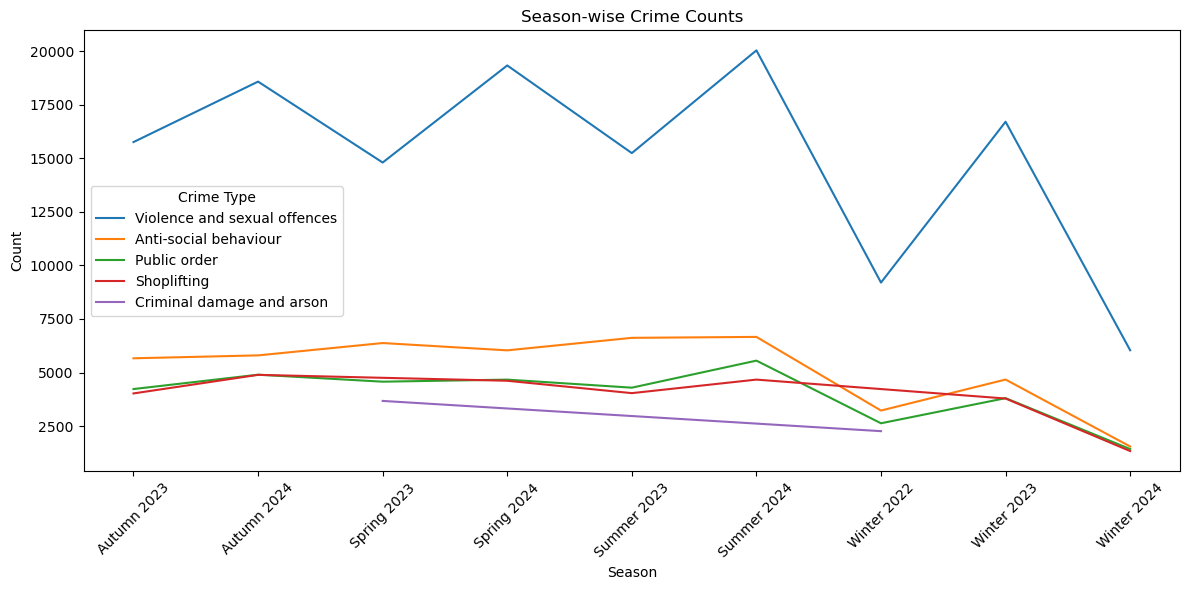

In [8]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=season_crime_counts, x='Season', y='Count', hue='Crime type', palette='tab10')
plt.title('Season-wise Crime Counts')
plt.xlabel('Season')
plt.ylabel('Count') 
plt.xticks(rotation=45)
plt.legend(title='Crime Type')
plt.tight_layout()
plt.show()

In [24]:
# Filter for 2023 data
df_2023 = df[df['Month'].str.startswith('2023')]

# Group by month for ALL crimes
months_grouped = df_2023.groupby('Month').size().reset_index(name='Count')
months_grouped['Month'] = months_grouped['Month'].str[5:]  # Extract just month part ('01', '02', etc.)

# Filter for ASB only
df_2023_asb = df[(df['Month'].str.startswith('2023')) & (df['Crime type'] == 'Anti-social behaviour')]

# Group ASB by month
asb_grouped = df_2023_asb.groupby('Month').size().reset_index(name='Count')
asb_grouped['Month'] = asb_grouped['Month'].str[5:]  # Extract just month part

# Create asb_2023_with_months
asb_2023_with_months = asb_grouped.copy()


# If you want to convert to month names for both:
month_map = {
    '01': 'Jan', '02': 'Feb', '03': 'Mar', '04': 'Apr',
    '05': 'May', '06': 'Jun', '07': 'Jul', '08': 'Aug',
    '09': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'
}

# Apply to both dataframes
months_grouped['Month'] = months_grouped['Month'].map(month_map)
asb_2023_with_months['Month'] = asb_2023_with_months['Month'].map(month_map)

months_grouped, asb_2023_with_months

(   Month  Count
 0    Jan  12566
 1    Feb  12936
 2    Mar  13749
 3    Apr  13733
 4    May  14862
 5    Jun  14950
 6    Jul  14546
 7    Aug  14515
 8    Sep  14510
 9    Oct  14787
 10   Nov  14037
 11   Dec  13667,
    Month  Count
 0    Jan   1511
 1    Feb   1713
 2    Mar   1872
 3    Apr   2177
 4    May   2327
 5    Jun   2341
 6    Jul   2134
 7    Aug   2144
 8    Sep   1935
 9    Oct   2041
 10   Nov   1688
 11   Dec   1451)

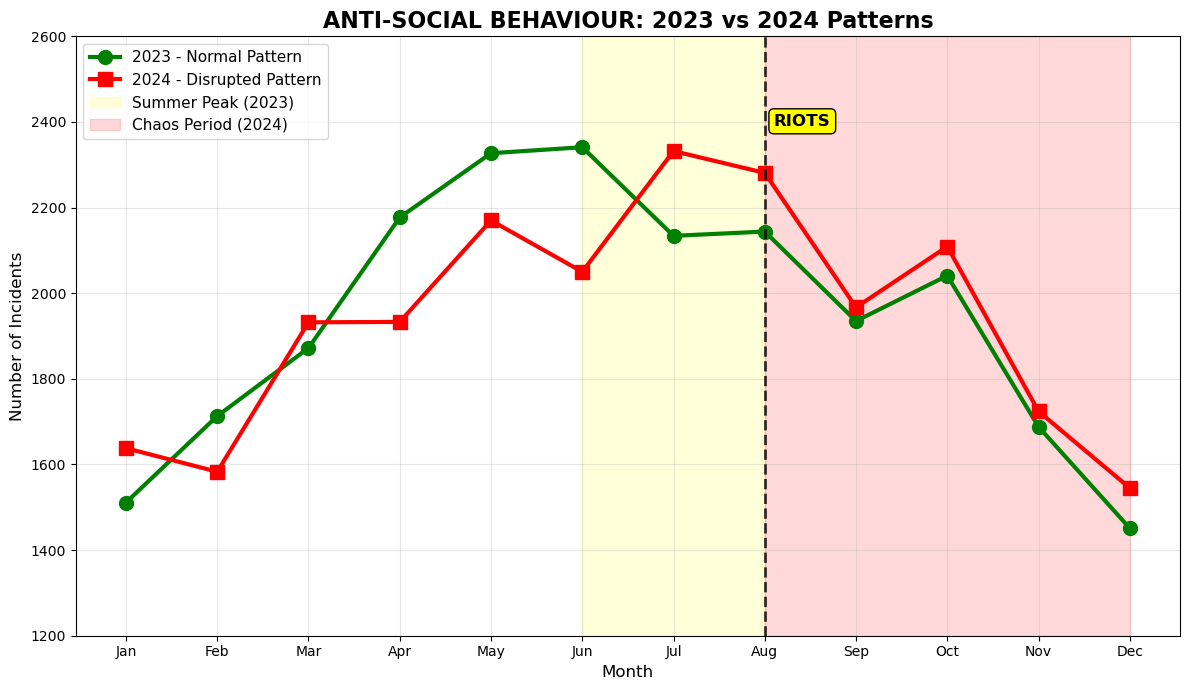

In [35]:
# ASB figure showing overlayed 2023 vs 2024 patterns
fig, ax = plt.subplots(figsize=(12, 7))

# For 2023 - using dataframe approach
df_2023_asb = df[(df['Month'].str.startswith('2023')) & (df['Crime type'] == 'Anti-social behaviour')]
asb_2023_grouped = df_2023_asb.groupby('Month').size().reset_index(name='Count')
asb_2023_grouped = asb_2023_grouped.sort_values('Month')

# For 2024 - using dataframe approach
df_2024_asb = df[(df['Month'].str.startswith('2024')) & (df['Crime type'] == 'Anti-social behaviour')]
asb_2024_grouped = df_2024_asb.groupby('Month').size().reset_index(name='Count')
asb_2024_grouped = asb_2024_grouped.sort_values('Month')

# Extract values
x_pos = range(12)
y_2023 = asb_2023_grouped['Count'].values
y_2024 = asb_2024_grouped['Count'].values

# Plot both years
ax.plot(x_pos, y_2023, 'g-o', linewidth=3, markersize=10, label='2023 - Normal Pattern')
ax.plot(x_pos, y_2024, 'r-s', linewidth=3, markersize=10, label='2024 - Disrupted Pattern')

# Add summer peak shading (for 2023 pattern)
ax.axvspan(5, 7, alpha=0.15, color='yellow', label='Summer Peak (2023)')

# Add chaos period shading (for 2024 pattern)
ax.axvspan(7, 11, alpha=0.15, color='red', label='Chaos Period (2024)')

# Add riots line
ax.axvline(x=7, color='black', linestyle='--', linewidth=2, alpha=0.8)
ax.text(7.1, max(max(y_2023), max(y_2024)) + 50, 'RIOTS', rotation=0, fontsize=12, weight='bold',
        bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', edgecolor='black'))


# Labels and formatting
ax.set_title('ANTI-SOCIAL BEHAVIOUR: 2023 vs 2024 Patterns', fontsize=16, weight='bold')
ax.set_ylabel('Number of Incidents', fontsize=12)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylim(1200, 2600)
ax.grid(True, alpha=0.3)
ax.legend(loc='upper left', fontsize=11)

# Set x-tick labels
ax.set_xticks(x_pos)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.tight_layout()
plt.show()

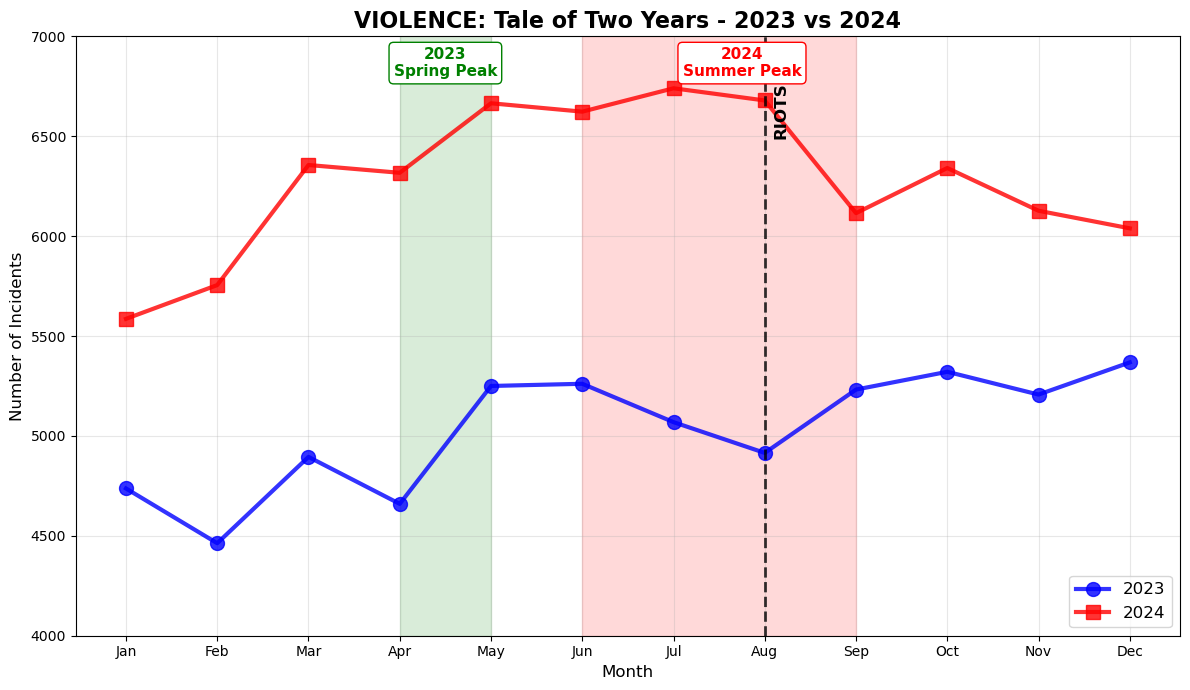

In [43]:
# Violence figure showing overlayed 2023 vs 2024 patterns
fig, ax = plt.subplots(figsize=(12, 7))

# For 2023 - using dataframe approach
df_2023_violence = df[(df['Month'].str.startswith('2023')) & (df['Crime type'] == 'Violence and sexual offences')]
violence_2023_grouped = df_2023_violence.groupby('Month').size().reset_index(name='Count')
violence_2023_grouped = violence_2023_grouped.sort_values('Month')

# For 2024 - using dataframe approach
df_2024_violence = df[(df['Month'].str.startswith('2024')) & (df['Crime type'] == 'Violence and sexual offences')]
violence_2024_grouped = df_2024_violence.groupby('Month').size().reset_index(name='Count')
violence_2024_grouped = violence_2024_grouped.sort_values('Month')

# Extract values
x_pos = range(12)
y_2023 = violence_2023_grouped['Count'].values
y_2024 = violence_2024_grouped['Count'].values

# Plot both years
ax.plot(x_pos, y_2023, 'b-o', linewidth=3, markersize=10, label='2023', alpha=0.8)
ax.plot(x_pos, y_2024, 'r-s', linewidth=3, markersize=10, label='2024', alpha=0.8)

# Add shading for peak periods
ax.axvspan(3, 4, alpha=0.15, color='green')
ax.text(3.5, 6800, '2023\nSpring Peak', ha='center', fontsize=11, weight='bold', color='green',
        bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor='green'))

ax.axvspan(5, 8, alpha=0.15, color='red')
ax.text(6.75, 6800, '2024\nSummer Peak', ha='center', fontsize=11, weight='bold', color='red',
        bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor='red'))

# Add riots line
ax.axvline(x=7, color='black', linestyle='--', linewidth=2, alpha=0.8)
ax.text(7.1, 6500, 'RIOTS', rotation=90, fontsize=12, weight='bold')

# Labels and formatting
ax.set_title('VIOLENCE: Tale of Two Years - 2023 vs 2024', fontsize=16, weight='bold')
ax.set_ylabel('Number of Incidents', fontsize=12)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylim(4000, 7000)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=12, loc='lower right')

# Set x-tick labels
ax.set_xticks(x_pos)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.tight_layout()
plt.show()